In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler ,PowerTransformer 
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### sqft_living  = total area inside the house , sqft_lot = total area including all property , waterfront = sea or ocean for view , view = means how good view front of house 0 = No view these are quelityes : 
######  1 = Average view
###### 2 = Fair view
###### 3 = Good view
###### 4 = Excellent view

### Condition = means how good house is ? also have some qualityes :
###### 1–2 → Poor condition
###### 3–4 → Fair condition
###### 5 → Average condition
###### 6–7 → Good condition
###### 8–9 → Very good condition


#### 1. grade

Overall construction and design quality of the house.
Higher grade → better materials and design → higher price.

2. sqft_above

Square feet above ground level.
Includes first floor, second floor, etc.
Does not include basement.

3. sqft_basement

Area of the basement in square feet.

Example:

sqft_living = sqft_above + sqft_basement

4. yr_built

Year when the house was originally built.

Older houses often cost less unless renovated.

5. yr_renovated

Year when house was renovated.

If value = 0 → house never renovated.

6. zipcode

Area postal code showing house location.

Location strongly affects price.

7. lat

Latitude coordinate of the house location (map position).

8. long

Longitude coordinate of the house.

Together with latitude, it gives exact location.

9. sqft_living15

Average living area of neighboring houses.

Bigger surrounding homes often increase price.

10. sqft_lot15

Average lot size of nearby houses.

In [102]:
df =  pd.read_csv('csv/House_dataset.csv') 
df = df.drop(['sqft_above','sqft_basement','yr_built','zipcode','sqft_living15','sqft_lot15' , 'date' , 'id'], axis=1)

In [103]:
df['yr_renovated'] = np.where(df['yr_renovated'] > 0 , 1 , df['yr_renovated'])

In [104]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s, Describe variable: bedrooms]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.26it/s]


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  yr_renovated  21613 non-null  int64  
 11  lat           21613 non-null  float64
 12  long          21613 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


In [106]:
df[df.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,1,47.6499,-122.088
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,0,47.5213,-122.357
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,0,47.5443,-122.172
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,0,47.5644,-122.093
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,0,47.5818,-122.402
21225,635000.0,3,3.00,2230,1407,2.5,0,0,3,8,0,47.5446,-122.017


In [107]:
df[(df['price'] == 550000.0) & (df['bedrooms'] == 4) & (df['bathrooms'] == 1.75)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
707,550000.0,4,1.75,2480,14782,1.0,0,3,3,8,0,47.7646,-122.271
1832,550000.0,4,1.75,2030,5688,2.0,0,4,4,9,0,47.5071,-122.387
3950,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,1,47.6499,-122.088
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,1,47.6499,-122.088
9520,550000.0,4,1.75,2150,9000,1.0,0,0,4,7,0,47.6812,-122.113
17925,550000.0,4,1.75,2550,39460,1.0,0,0,3,8,0,47.7707,-122.123


In [108]:
df['yr_renovated'].unique()

array([0, 1])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  yr_renovated  21613 non-null  int64  
 11  lat           21613 non-null  float64
 12  long          21613 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


In [110]:
df.isna().mean()*100

price           0.0
bedrooms        0.0
bathrooms       0.0
sqft_living     0.0
sqft_lot        0.0
floors          0.0
waterfront      0.0
view            0.0
condition       0.0
grade           0.0
yr_renovated    0.0
lat             0.0
long            0.0
dtype: float64

In [111]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'lat',
       'long'],
      dtype='object')

In [112]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,0.042289,47.560053,-122.213896
std,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,0.201253,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,1.000000,47.777600,-121.315000


In [113]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
price,1.000000,0.308377,0.525136,0.702035,0.089661,0.256793,0.266370,0.397294,0.036361,0.667434,0.126092,0.307003,0.021626
bedrooms,0.308377,1.000000,0.515932,0.576693,0.031713,0.175466,-0.006578,0.079543,0.028502,0.356978,0.018562,-0.008913,0.129482
bathrooms,0.525136,0.515932,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.050260,0.024573,0.223042
sqft_living,0.702035,0.576693,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.055094,0.052529,0.240223
sqft_lot,0.089661,0.031713,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.007745,-0.085683,0.229521
floors,0.256793,0.175466,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.006260,0.049614,0.125419
waterfront,0.266370,-0.006578,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.093294,-0.014274,-0.041910
view,0.397294,0.079543,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.104062,0.006157,-0.078400
condition,0.036361,0.028502,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.060139,-0.014941,-0.106500
grade,0.667434,0.356978,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.014008,0.114084,0.198372


In [114]:
fig1 = px.scatter_3d(df , x='sqft_living', y='price' , z='grade', title='house price vs berooms and sqft_living',color='sqft_living')
fig1.show()

In [115]:
fig2 = px.box(df, x='price')
fig2.show()

In [116]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,47.5345,-122.069


In [117]:

df_col = ['price','bedrooms','bathrooms','sqft_living','sqft_lot',
          'floors','waterfront','view','condition','grade','yr_renovated','lat','long']


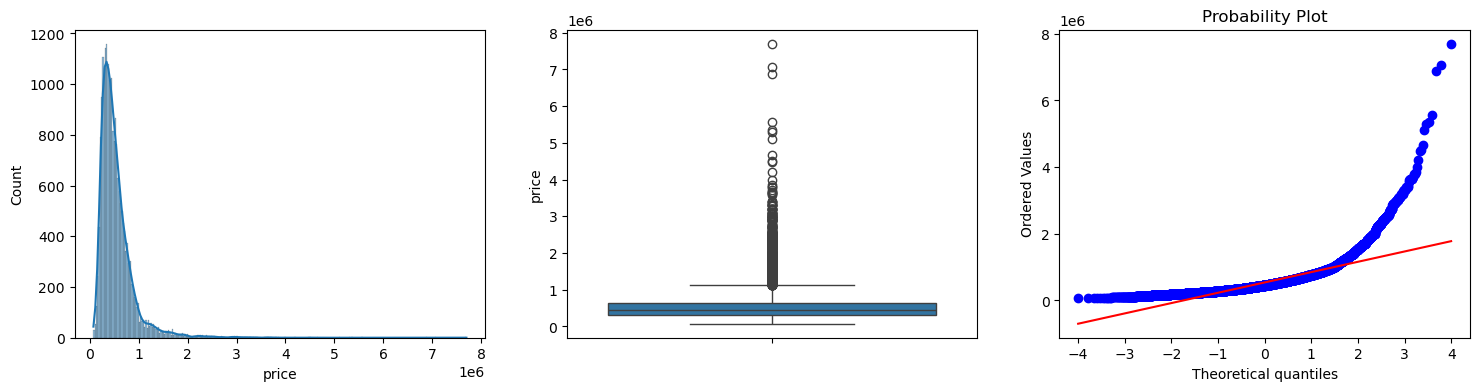

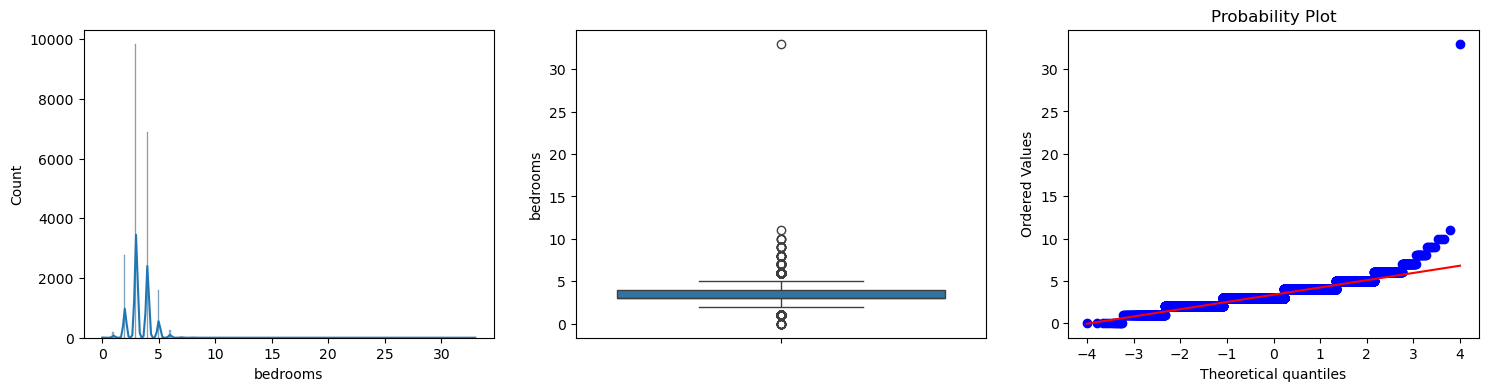

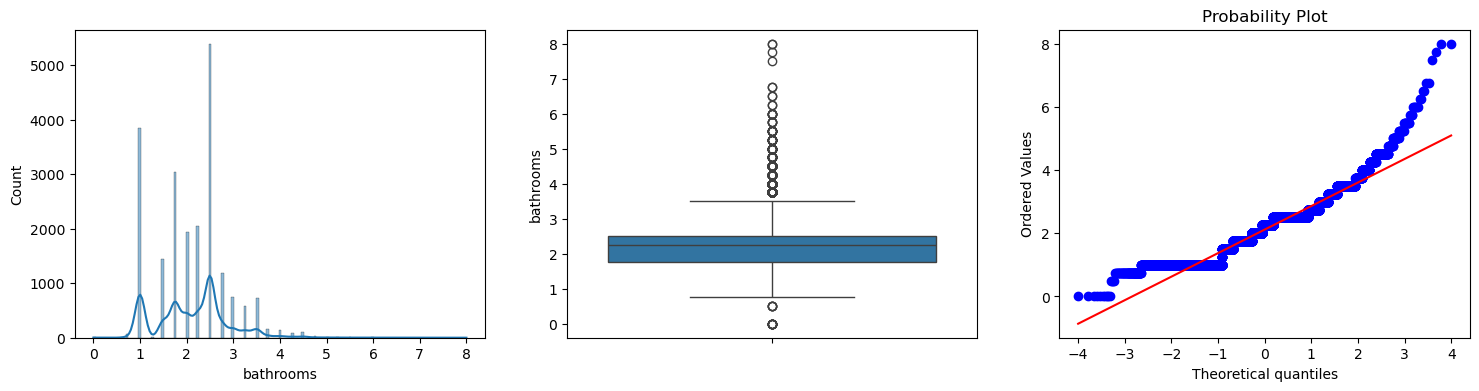

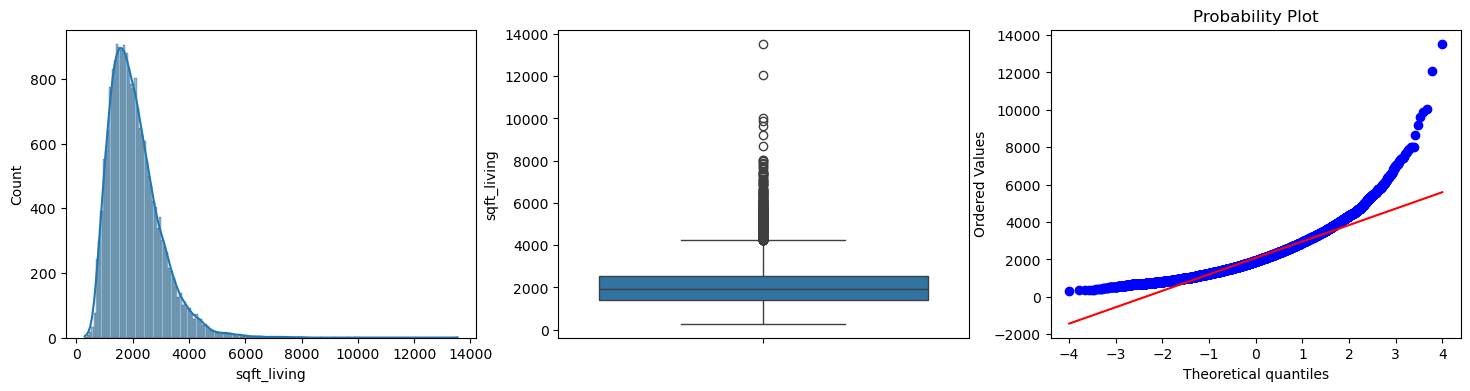

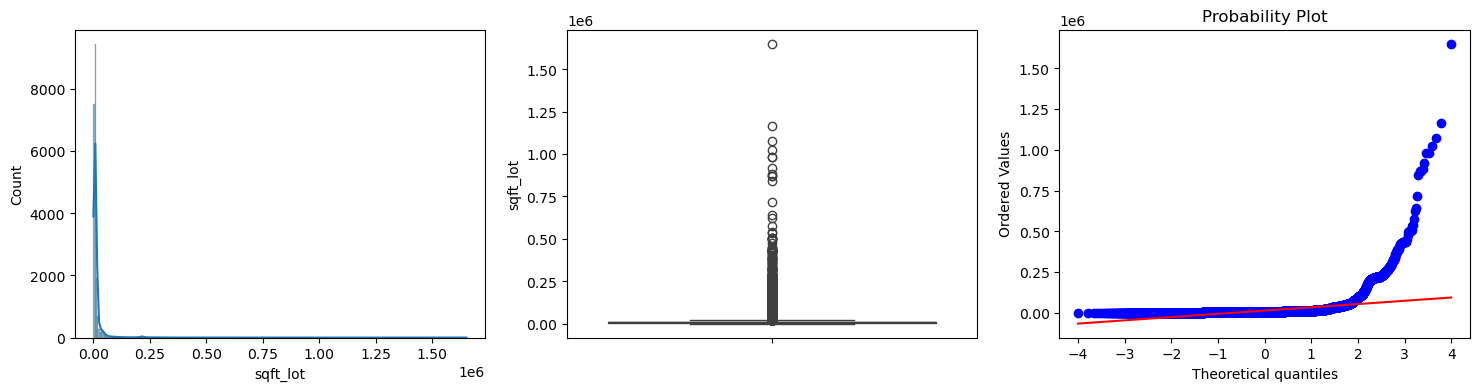

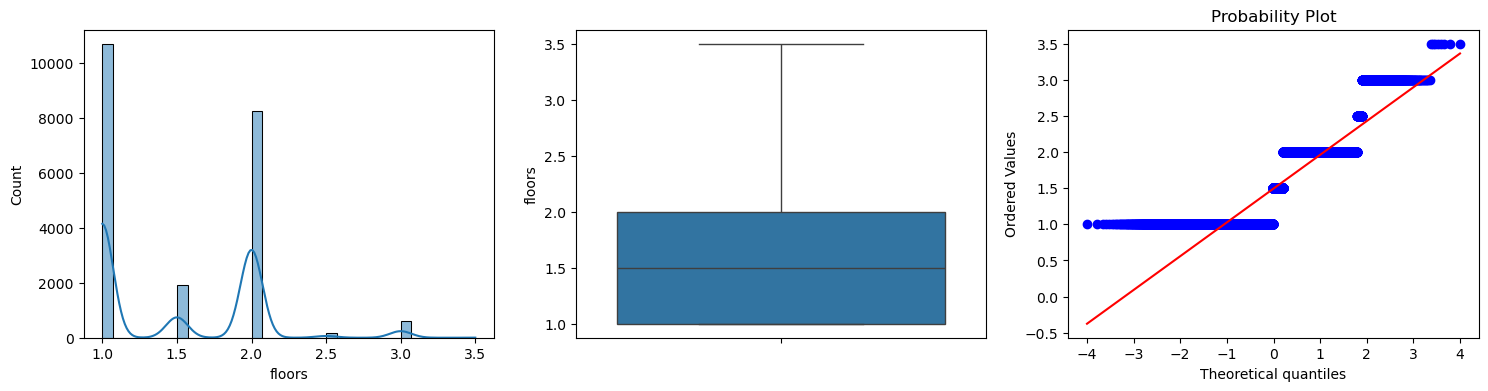

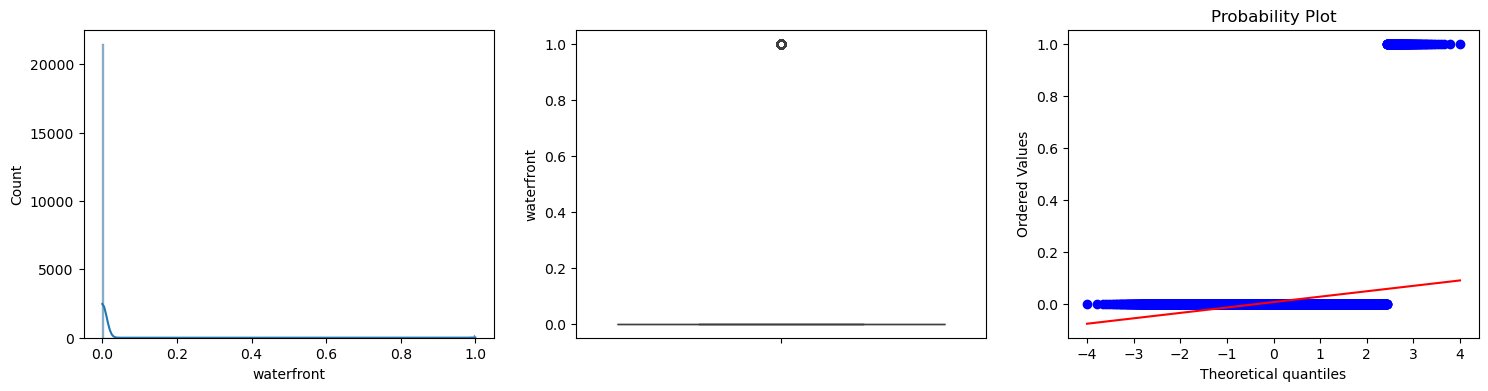

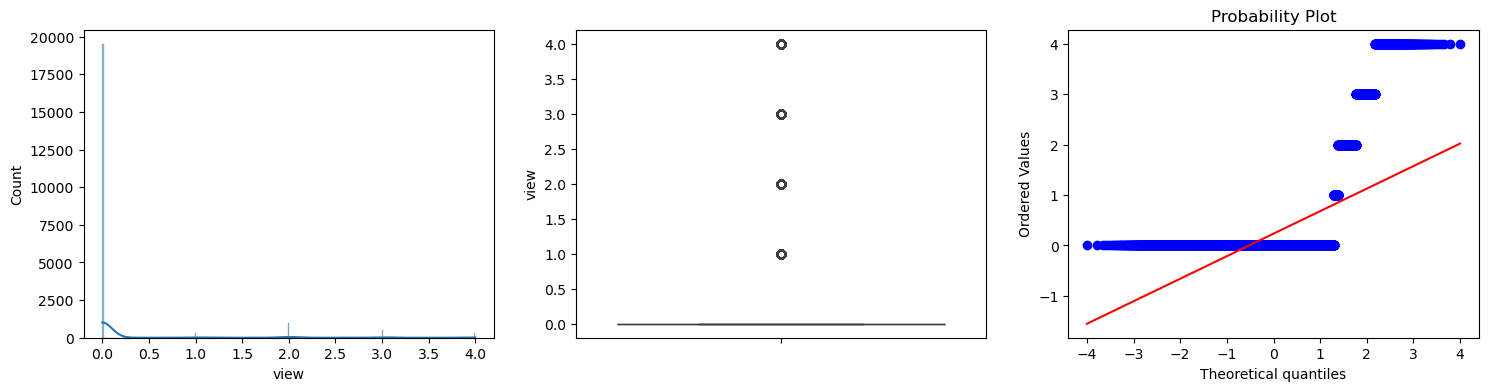

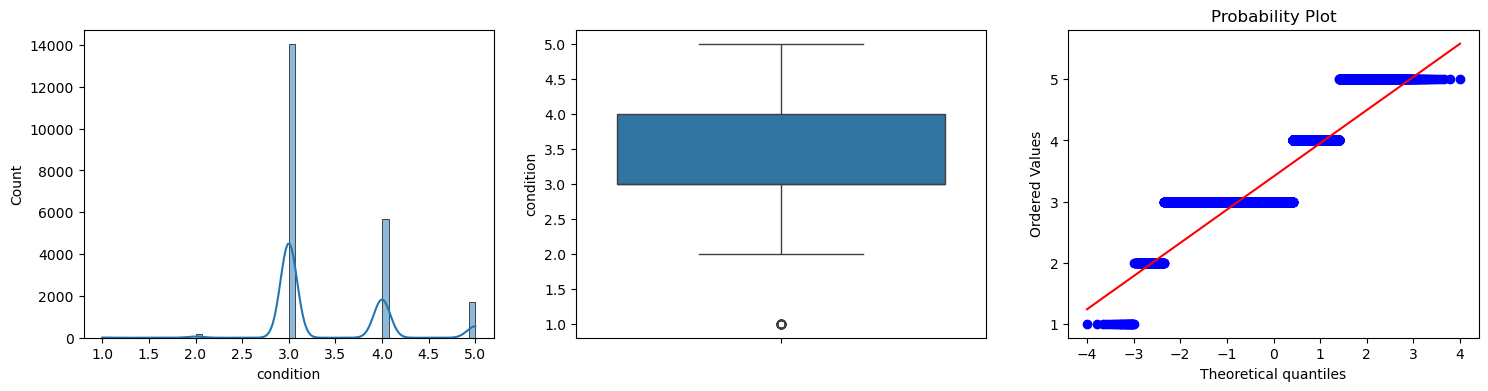

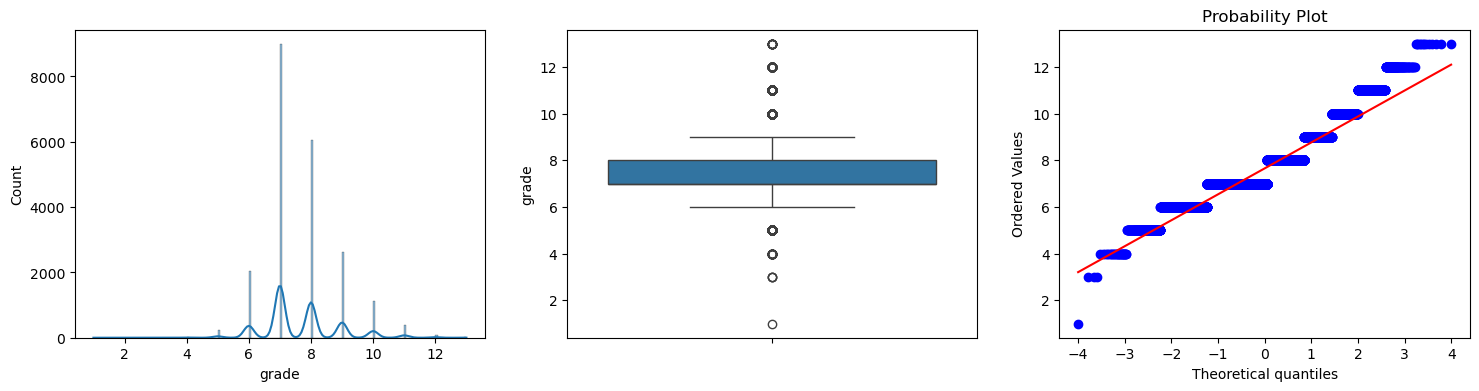

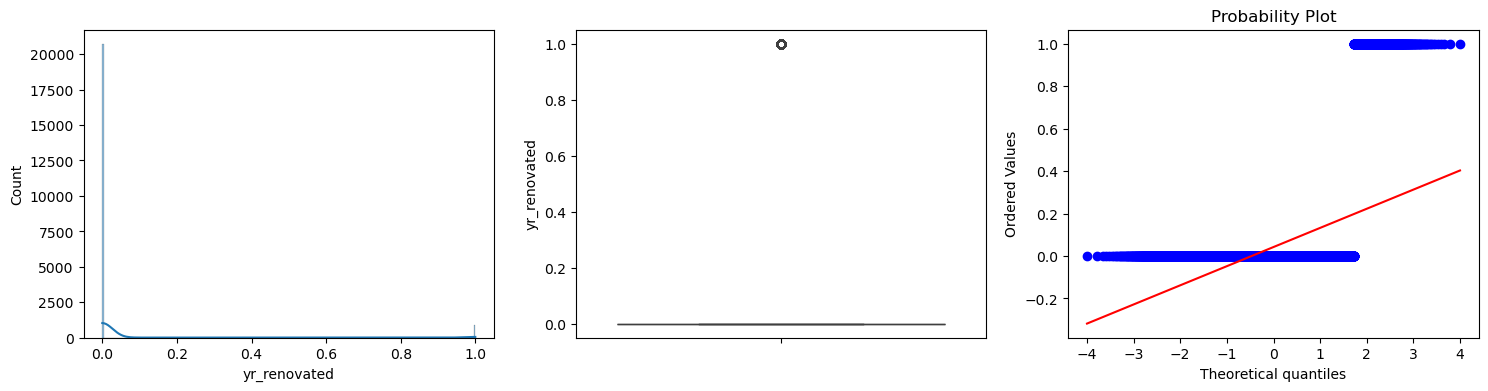

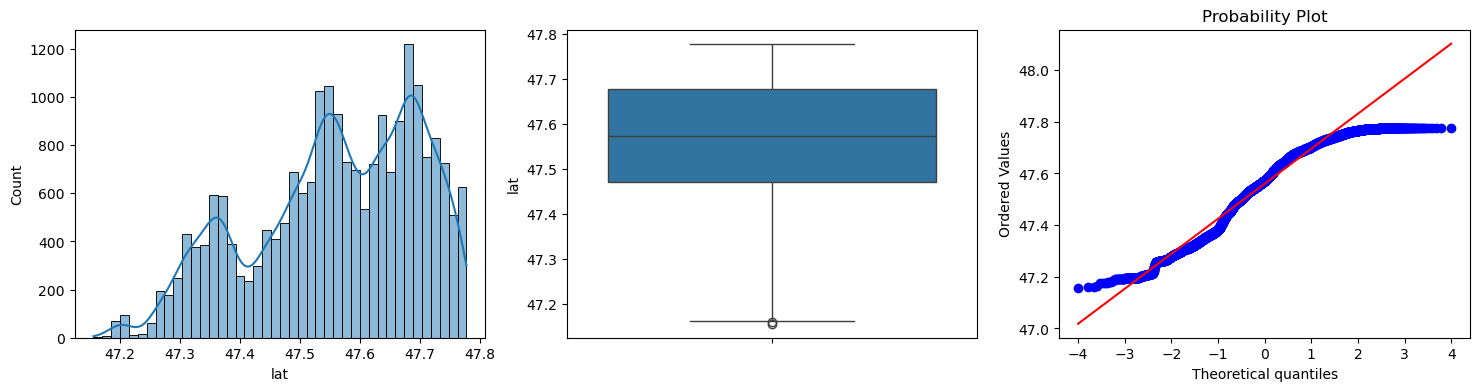

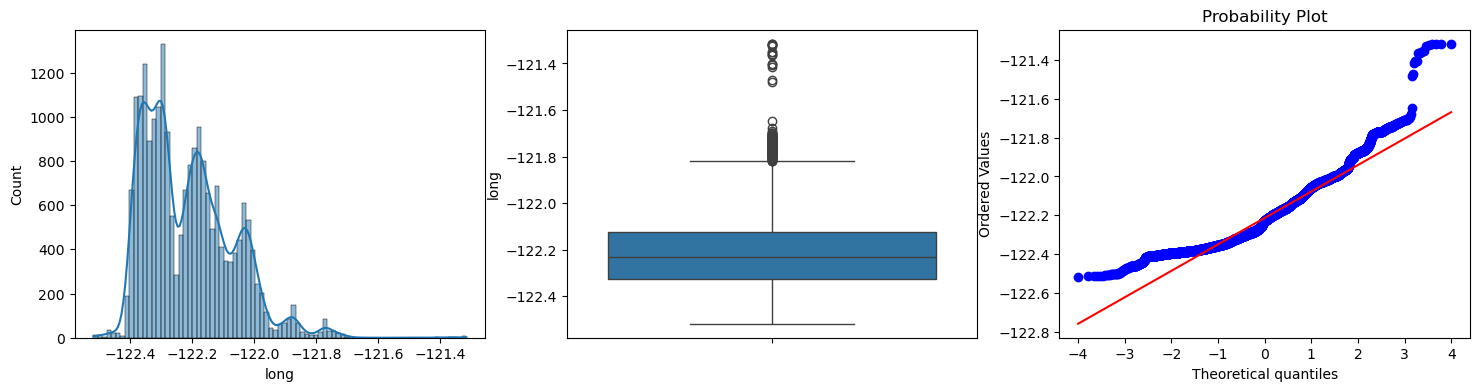

In [118]:
%matplotlib inline
for cols in df_col: 
    plt.figure(figsize=(18,4))
    
    plt.subplot(131)
    sns.histplot(df[cols],kde=True)
    
    plt.subplot(132)
    sns.boxplot(df[cols])
    
    plt.subplot(133)
    stats.probplot(df[cols],plot=plt)
    
    plt.show()


In [119]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,47.5345,-122.069


In [120]:
big_outlier = df['bedrooms'] == 33 
row = df[big_outlier]

In [121]:
row.index

Index([15870], dtype='int64')

In [122]:
df = df.drop(row.index)

In [123]:
x= df.drop('price',axis=1)
y= df['price']

In [124]:
x_train , x_test ,y_train ,y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

In [125]:
x_train.shape

(15128, 12)

In [126]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
167,4,2.50,2680,4499,2.0,0,0,3,9,0,47.5650,-122.125
12412,4,1.75,2340,5080,1.0,0,0,5,7,0,47.6746,-122.320
7691,4,2.25,2190,9020,2.0,0,0,3,8,0,47.3742,-122.284
12460,2,1.75,2260,280962,2.0,0,2,3,9,0,47.6359,-121.940
9099,4,1.75,2110,265716,1.0,0,0,4,8,0,47.6570,-122.026
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,0,47.7144,-122.319
21576,5,4.50,4850,10584,2.0,1,4,3,10,0,47.5943,-122.110
5390,3,2.50,2120,4780,2.0,0,0,3,7,0,47.6810,-122.032
860,1,0.75,380,15000,1.0,0,0,3,5,0,47.4810,-122.323


In [127]:
df['bathrooms'] = np.floor(df['bathrooms'])

In [128]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
0,231300.0,2,1.0,1180,5650,1.0,0,0,3,7,0,47.5112,-122.257
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,1,47.7210,-122.319
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,0,47.7379,-122.233
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,0,47.5208,-122.393
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,0,47.6993,-122.346
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,0,47.5107,-122.362
21610,402101.0,2,0.0,1020,1350,2.0,0,0,3,7,0,47.5944,-122.299
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,0,47.5345,-122.069


In [129]:
df[df['floors'] == 3.5 ]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
875,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,0,47.6362,-122.322
10077,435000.0,3,3.0,1440,1350,3.5,0,2,3,8,0,47.6525,-122.345
11594,544000.0,3,2.0,1760,1755,3.5,0,0,3,8,0,47.6688,-122.279
14885,525000.0,3,3.0,1730,1074,3.5,0,0,3,8,0,47.6692,-122.392
15424,479000.0,2,2.0,1730,1037,3.5,0,0,3,8,0,47.5594,-122.285
18477,3300000.0,8,4.0,7710,11750,3.5,0,0,5,12,0,47.6263,-122.314
20308,525000.0,2,2.0,1310,1268,3.5,0,0,3,8,0,47.6534,-122.355
20772,563500.0,3,2.0,1400,1312,3.5,0,0,3,8,0,47.6534,-122.355


In [130]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
price,1.000000,0.315472,0.510097,0.702046,0.089664,0.256810,0.266371,0.397299,0.036335,0.667447,0.126095,0.306998,0.021637
bedrooms,0.315472,1.000000,0.480411,0.591488,0.032817,0.181123,-0.006606,0.081941,0.025509,0.366513,0.019331,-0.010522,0.133891
bathrooms,0.510097,0.480411,1.000000,0.697872,0.085301,0.473817,0.058796,0.177247,-0.125921,0.606624,0.059980,0.031396,0.179319
sqft_living,0.702046,0.591488,0.697872,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.055089,0.052552,0.240209
sqft_lot,0.089664,0.032817,0.085301,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.007743,-0.085675,0.229516
floors,0.256810,0.181123,0.473817,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.006251,0.049655,0.125388
waterfront,0.266371,-0.006606,0.058796,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.093293,-0.014270,-0.041914
view,0.397299,0.081941,0.177247,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.104059,0.006170,-0.078413
condition,0.036335,0.025509,-0.125921,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.060124,-0.015048,-0.106423
grade,0.667447,0.366513,0.606624,0.762701,0.113616,0.458171,0.082773,0.251315,-0.144632,1.000000,0.014003,0.114111,0.198355


In [131]:
df['lat'].max()

47.7776

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21612 non-null  float64
 1   bedrooms      21612 non-null  int64  
 2   bathrooms     21612 non-null  float64
 3   sqft_living   21612 non-null  int64  
 4   sqft_lot      21612 non-null  int64  
 5   floors        21612 non-null  float64
 6   waterfront    21612 non-null  int64  
 7   view          21612 non-null  int64  
 8   condition     21612 non-null  int64  
 9   grade         21612 non-null  int64  
 10  yr_renovated  21612 non-null  int64  
 11  lat           21612 non-null  float64
 12  long          21612 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.3 MB


In [133]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,lat,long
0,231300.0,2,1.0,1180,5650,1.0,0,0,3,7,0,47.5112,-122.257
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,1,47.7210,-122.319
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,0,47.7379,-122.233
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,0,47.5208,-122.393
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,0,47.6993,-122.346
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,0,47.5107,-122.362
21610,402101.0,2,0.0,1020,1350,2.0,0,0,3,7,0,47.5944,-122.299
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,0,47.5345,-122.069


In [134]:
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'lat',
       'long'] 

In [135]:
num_pipe = Pipeline(
    [
        ('POWER TRANSFORMER',PowerTransformer(standardize=True)),
        ('Pca',PCA(n_components=0.90 ,random_state=42))
    ])

In [136]:
preprocessing  = ColumnTransformer(transformers=[
    ('Num_data',num_pipe , num_cols)
])

In [137]:
pipe = Pipeline([
    ('Preprocessing' , preprocessing),
    ('Model',LinearRegression())
])

In [138]:
pipe.fit(x_train ,y_train)

,steps,"[('Preprocessing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num_data', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [139]:
y_pred = pipe.predict(x_test)

In [140]:
r2_score(y_test , y_pred)

0.5866291469680245